<a href="https://colab.research.google.com/github/eyamilabraham/convolutional-neural-networks-numbers-mode-3-RNC-with-data-increase-and-dropout/blob/main/convolutional_neural_networks_numbers_mode_3_RNC_with_data_increase_and_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Downloading MNIST dataset (handwritten numbers, labeled)
#Data Augmentation from Keras
(X_training, Y_training), (X_testing, Y_testing) = mnist.load_data()

In [6]:
#Put each data in right way(1, 28, 28, 1)
X_training = X_training.reshape(X_training.shape[0], 28, 28, 1)
X_testing = X_testing.reshape(X_testing.shape[0], 28, 28, 1)

#Making 'one-hot encoding' from results (e.g. instead of having only one neuron as a result, I will have 10 where only the correct result will be 1 and the rest will be 0.)
Y_training = to_categorical(Y_training)
Y_testing = to_categorical(Y_testing)

#Convert to float and normalize the network that it could learn faster
X_training = X_training.astype('float32') / 255
X_testing = X_testing.astype('float32') / 255

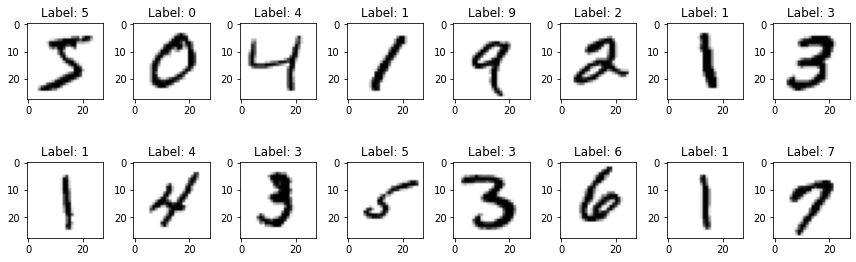

In [7]:
#Code to display pictures from dataset
import matplotlib.pyplot as plt
rows = 2
columns = 8
num = rows*columns
pictures = X_training[0:num]
labels = Y_training[0:num]
fig, axes = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))
for i in range(num):
     ax = axes[i//columns, i%columns]
     ax.imshow(pictures[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(labels[i])))
plt.tight_layout()
plt.show()

In [8]:
#Increase of data
#Variables to control transformations to increase of data
#Deploying ImageDataGenerator from keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rotation_range = 30
mov_width = 0.25
mov_height = 0.25
#inclination_rangen=15 
approach_range=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rotation_range,
    width_shift_range = mov_width,
    height_shift_range = mov_height,
    zoom_range=approach_range,
    #shear_range=inclination_range
)

datagen.fit(X_training)

BEFORE:



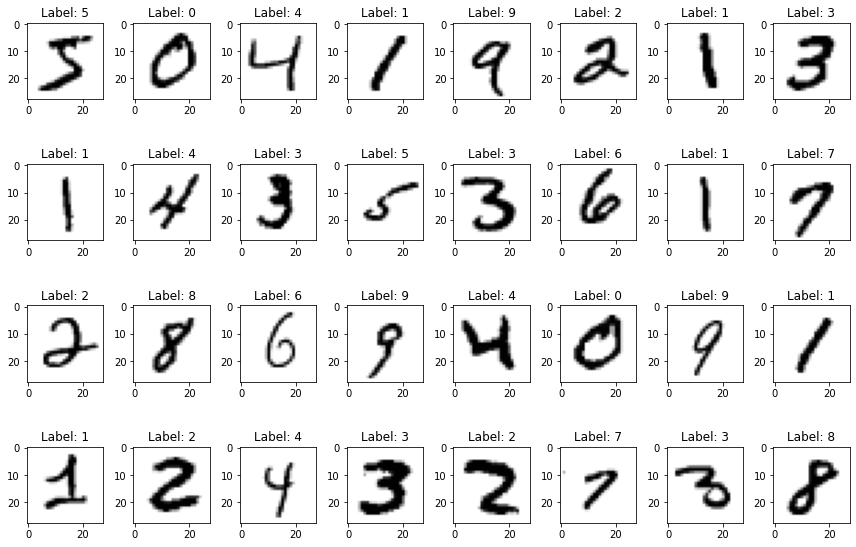

AFTER:



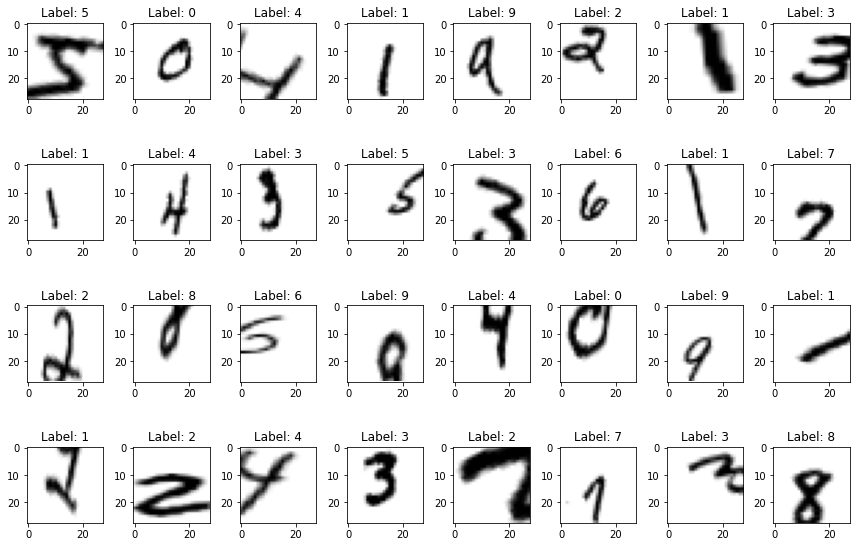

In [9]:
#Code to display pictures from dataset before and after of one of transformations
rows = 4
columns = 8
num = rows*columns
print('BEFORE:\n')
fig1, axes1 = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))
for i in range(num):
     ax = axes1[i//columns, i%columns]
     ax.imshow(X_training[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_training[i])))
plt.tight_layout()
plt.show()
print('AFTER:\n')
fig2, axes2 = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))
for X, Y in datagen.flow(X_training,Y_training.reshape(Y_training.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columns, i%columns]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [10]:
#Model!
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compiling
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
##The data to train will come from the datagen, so that they are generated with the transformations that we indicate
data_gen_training = datagen.flow(X_training, Y_training, batch_size=32)

In [12]:
SIZE_BATCH = 32

#Training the network
print("Training the model...");
epochs=60
history = model.fit(
    data_gen_training,
    epochs=epochs,
    batch_size=SIZE_BATCH,
    validation_data=(X_testing, Y_testing),
    steps_per_epoch=int(np.ceil(60000 / float(SIZE_BATCH))),
    validation_steps=int(np.ceil(10000 / float(SIZE_BATCH)))
)

print("Model trained!");

Training the model...
Epoch 1/60
1875/1875 [==============================] - 42s 18ms/step - loss: 1.2293 - accuracy: 0.5890 - val_loss: 0.1561 - val_accuracy: 0.9600
Epoch 2/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6991 - accuracy: 0.7753 - val_loss: 0.1068 - val_accuracy: 0.9688
Epoch 3/60
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5780 - accuracy: 0.8142 - val_loss: 0.0952 - val_accuracy: 0.9715
Epoch 4/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5125 - accuracy: 0.8367 - val_loss: 0.0828 - val_accuracy: 0.9739
Epoch 5/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4761 - accuracy: 0.8462 - val_loss: 0.0650 - val_accuracy: 0.9791
Epoch 6/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4579 - accuracy: 0.8526 - val_loss: 0.0785 - val_accuracy: 0.9728
Epoch 7/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4256 - accuracy: 0.860

In [13]:
#Exporting the model to browser
model.save('numbers_conv_ad_do.h5')

#Converting a tensorflow.js
!pip install tensorflowjs

!mkdir folder_output

!tensorflowjs_converter --input_format keras numbers_conv_ad_do.h5 folder_output

     |████████████████████████████████| 77 kB 3.2 MB/s 
